In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import Sequential

In [2]:
train_data=keras.utils.image_dataset_from_directory(
    directory= "E://pets/train",
    labels= "inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)


Found 288 files belonging to 2 classes.


In [3]:
test_data=keras.utils.image_dataset_from_directory(
    directory= "E://pets/test",
    labels= "inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
    
)

Found 54 files belonging to 2 classes.


In [4]:
def process(image, label):
    tf.cast(image/255, tf.float32)
    return image, label


In [5]:
train_data=train_data.map(process)
test_data=test_data.map(process)

In [6]:
model=Sequential()

In [7]:
#2 layers of cnn
model.add(Conv2D(64, kernel_size=(4,4),padding="valid",  activation="relu", input_shape=(256, 256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(32, kernel_size=(4,4),padding="valid",  activation="relu", input_shape=(256, 256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#3 layers of ann
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 253, 253, 64)        │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 123, 123, 32)        │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 119072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,241,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,277,409 (58.28 MB)

 Trainable params: 15,277,409 (58.28 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss="binary_crossentropy", optimizer="Adam",metrics=["accuracy"] )

In [10]:
model.fit(train_data, epochs=15, validation_data=test_data)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.4872 - loss: 111.2909 - val_accuracy: 0.5556 - val_loss: 0.6463
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.7242 - loss: 0.5725 - val_accuracy: 0.5556 - val_loss: 0.7297
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8964 - loss: 0.2986 - val_accuracy: 0.5370 - val_loss: 0.9671
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9527 - loss: 0.1151 - val_accuracy: 0.5741 - val_loss: 1.9482
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9937 - loss: 0.0428 - val_accuracy: 0.5741 - val_loss: 2.2686
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9897 - loss: 0.0365 - val_accuracy: 0.5741 - val_loss: 1.9142
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9938 - loss: 0.0551 - val_accuracy: 0.5185 - val_loss: 2.0118
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 0.5370 - val_loss: 4.1786
Epoch 

In [11]:
import cv2

In [12]:
image=cv2.imread("E://check/1005.jpg")


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - resize() missing required argument 'dsize' (pos 2)
>  - resize() missing required argument 'dsize' (pos 2)


In [ ]:
model.predict(image_up1)

TypeError: Image data of dtype object cannot be converted to float

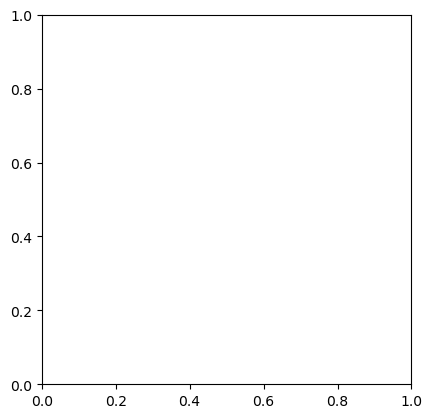

In [19]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [16]:
img_up = cv2.resize(image, (256,256))

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
